In [ ]:
#Data collection
import pandas_datareader as pdr

In [ ]:
# df.to_csv('NVdia.csv')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/content/NVdia.csv")

In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,NVDA,2024-03-11 00:00:00+00:00,857.740,887.97,841.660,864.29,66611510,857.740,887.97,841.660,864.29,66611510,0.0,1.0
1255,NVDA,2024-03-12 00:00:00+00:00,919.130,919.60,861.501,880.49,65437480,919.130,919.60,861.501,880.49,65437480,0.0,1.0
1256,NVDA,2024-03-13 00:00:00+00:00,908.880,915.04,884.350,910.55,62726626,908.880,915.04,884.350,910.55,62726626,0.0,1.0
1257,NVDA,2024-03-14 00:00:00+00:00,879.440,906.46,866.000,895.77,59711081,879.440,906.46,866.000,895.77,59711081,0.0,1.0
1258,NVDA,2024-03-15 00:00:00+00:00,878.365,895.46,862.570,869.30,64208616,878.365,895.46,862.570,869.30,64208616,0.0,1.0


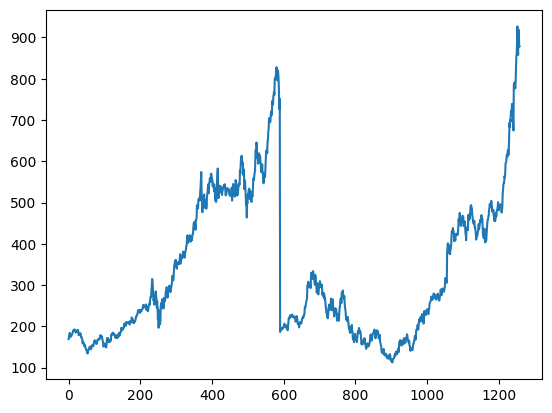

In [ ]:
plt.plot(df['close'])

### Doing on stock closing price

In [ ]:
##for close column will do stock prediction
df1=df.reset_index()['close']

In [ ]:
df1.shape

(1259,)

In [ ]:
type(df1)

pandas.core.series.Series

In [ ]:
df1.sort_values(ascending=False).head(30)

1252    926.690
1255    919.130
1256    908.880
1251    887.000
1257    879.440
1258    878.365
1253    875.280
1250    859.640
1254    857.740
1249    852.370
580     827.940
1248    822.790
584     820.500
579     819.480
581     814.870
585     810.000
578     808.480
583     802.010
576     801.070
577     800.100
575     799.400
582     796.110
586     793.660
1247    791.120
1244    790.920
1243    788.170
1245    787.010
1242    785.380
1246    776.630
573     768.220
Name: close, dtype: float64

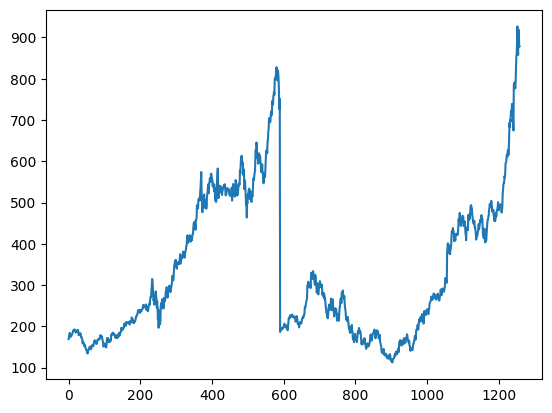

In [ ]:
#plotting on stock closing price
plt.plot(df1)

In [ ]:
#For transformation
## LSTM are sensitive to the scale of the data. so we apply MinMax scaler(to trasform)
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler(feature_range=(0,1))
df1=scale.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.06959554],
       [0.07789593],
       [0.07628742],
       ...,
       [0.97813168],
       [0.94198325],
       [0.94066329]])

In [ ]:
df1.shape

(1259, 1)

In [ ]:
## splitting of the data->
##incase of time series data->divide data based on date as here next data  always  dependent on previous data
##65% training data  and 35% test data
train_size=int(len(df1)*0.65)
test_size=len(df1)-train_size
train_data, test_data=df1[0:train_size, : ], df1[train_size : len(df1) ,  : ]

In [ ]:
train_size, test_size

(818, 441)

In [ ]:
import numpy
#Data preprocessing
def create_dateset(dataset, time_step=1):
  #convert an array of values into dataset matrix
  dataX, dataY=[],  []
  for i in range(len(dataset)- time_step-1):
    a= dataset[i: (i+time_step), 0] ## i=0,   0,1,2,3,....99 (x)   100(y)
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])

  return numpy.array(dataX),  numpy.array(dataY)


In [ ]:
## reshape int x=t, t+1,t+2,t+3,t+4
time_step=100
x_train, y_train= create_dateset(train_data, time_step)
x_test, y_test=create_dateset(test_data, time_step)

In [ ]:
x_train[0]#total 100 days stock is present here

array([0.06959554, 0.07789593, 0.07628742, 0.08800128, 0.08009381,
       0.07552614, 0.07932025, 0.07886594, 0.07978684, 0.08262322,
       0.08596302, 0.08684708, 0.0937477 , 0.09330567, 0.09660863,
       0.09764004, 0.09453353, 0.09802068, 0.09733307, 0.09545443,
       0.08893446, 0.09324427, 0.09211463, 0.09089904, 0.09356352,
       0.09626483, 0.09687876, 0.09164804, 0.08081825, 0.08234081,
       0.08439135, 0.08374058, 0.08708038, 0.08685936, 0.0829793 ,
       0.07470347, 0.07569804, 0.0711181 , 0.06943592, 0.05670293,
       0.06111097, 0.05809042, 0.05883942, 0.05434542, 0.04847622,
       0.05254046, 0.04902876, 0.04303676, 0.04037229, 0.03813757,
       0.03446625, 0.03295597, 0.02847425, 0.02641143, 0.03773237,
       0.03562044, 0.03869011, 0.04080204, 0.0443997 , 0.04724835,
       0.04166155, 0.04419096, 0.03974608, 0.04022495, 0.04986371,
       0.05015839, 0.05136171, 0.04848849, 0.04959358, 0.04814469,
       0.0576975 , 0.06257214, 0.0638    , 0.06618207, 0.06134

In [ ]:
x_train.shape, x_test.shape, y_train.shape

((717, 100), (340, 100), (717,))

In [28]:
#In LSTM input shoud be like thus format that is 3D format[samples, time steps, features]
#reshape input to be [sample, time steps, features] which is must for LSTM
'''
x_train.shape[0]:  number of samples in the training dataset.
x_train.shape[1]: number of time steps in each sample.
1: number of features per time step. In this case, it's set to 1 as here we're dealing with univariate time series data.
'''
x_train=x_train.reshape(x_train.shape[0],   x_train.shape[1],  1)
x_test=x_test.reshape(x_test.shape[0],   x_test.shape[1],  1)

array([[0.06959554],
       [0.07789593],
       [0.07628742],
       ...,
       [0.97813168],
       [0.94198325],
       [0.94066329]])

#### Model creation

In [27]:
#the stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error

#### Hyper parameter tuning

In [31]:
# import numpy as np
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from tensorflow.keras.optimizers import Adam
# from scikeras.wrappers import KerasRegressor
# from sklearn.model_selection import GridSearchCV

# def create_model(units=32, learning_rate=0.001, hidden_layers=2, activation="linear", dropout_rate=0.0):
#     model = Sequential()
#     model.add(LSTM(units, return_sequences=True, input_shape=(100, 1)))
#     for _ in range(hidden_layers - 1):
#         model.add(LSTM(units, return_sequences=True))
#     model.add(LSTM(units))
#     model.add(Dense(1, activation=activation))
#     optimizer = Adam(learning_rate=learning_rate)
#     model.compile(loss='mean_squared_error', optimizer=optimizer)
#     return model


# kreg = KerasRegressor(build_fn=create_model, verbose=0)


# parameters = {
#     "model__units": [32, 64],
#     "model__learning_rate": [0.001, 0.01],
#     "model__hidden_layers": [2, 3],
#     "model__activation": ["linear", "relu"],
#     "model__dropout_rate": [0.0, 0.2],
#     "epochs": [50, 100]
# }


# grid = GridSearchCV(estimator=kreg, param_grid=parameters, cv=3)
# gridresult = grid.fit(x_train, y_train)


# # best_params = gridresult.best_params_

In [ ]:
# # best model with best parameters
# best_model = create_model(units=best_params["model__units"],
#                           learning_rate=best_params["model__learning_rate"],
#                           hidden_layers=best_params["model__hidden_layers"],
#                           activation=best_params["model__activation"],
#                           dropout_rate=best_params["model__dropout_rate"])

In [ ]:
#Model
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
## Early Stopping->when the val_loss becomes stagnant, model automatically stops training
import tensorflow as tf

early_stopping =tf. keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


In [ ]:
model.fit(x_train, y_train, validation_data=(x_test, y_test),  epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 11s 457ms/step - loss: 0.0420 - val_loss: 0.0186
Epoch 2/100
12/12 [==============================] - 2s 196ms/step - loss: 0.0132 - val_loss: 0.0041
Epoch 3/100
12/12 [==============================] - 2s 192ms/step - loss: 0.0086 - val_loss: 0.0036
Epoch 4/100
12/12 [==============================] - 2s 194ms/step - loss: 0.0074 - val_loss: 0.0073
Epoch 5/100
12/12 [==============================] - 2s 194ms/step - loss: 0.0071 - val_loss: 0.0040
Epoch 6/100
12/12 [==============================] - 3s 287ms/step - loss: 0.0062 - val_loss: 0.0055
Epoch 7/100
12/12 [==============================] - 2s 191ms/step - loss: 0.0064 - val_loss: 0.0045
Epoch 8/100
12/12 [==============================] - 2s 184ms/step - loss: 0.0058 - val_loss: 0.0023
Epoch 9/100
12/12 [==============================] - 2s 183ms/step - loss: 0.0045 - val_loss: 0.0035
Epoch 10/100
12/12 [==============================] - 2s 191ms/step - loss: 0.0041 - val_l

In [ ]:
#prediction
##These are transformed data
##prediction on the training data
train_predict=model.predict(x_train)
##prediction on the test data
test_predict=model.predict(x_test)

11/11 [==============================] - 0s 36ms/step


In [ ]:
# #Trnsformback to original form
##original data
train_predict_ori=scale.inverse_transform(train_predict)
test_predict_ori=scale.inverse_transform(test_predict)

In [ ]:
##Evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score
##mse of traning data
mse_train=mean_squared_error(y_train, train_predict)
mse_test=mean_squared_error(y_test,test_predict )
R2_train=r2_score(y_train, train_predict)
R2_test=r2_score(y_test,test_predict )
print(mse_train)
print(mse_test)
print(R2_test)
print(R2_train)

0.0010373171345653754
0.0009186607568942527
0.980227791513836
0.9753991019626486


In [ ]:
# #Trnsformback to original form
##original data
train_predict_ori=scale.inverse_transform(train_predict)
test_predict_ori=scale.inverse_transform(test_predict)

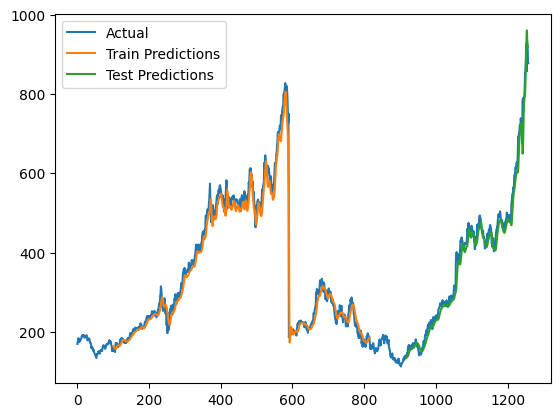

In [ ]:
#plotting
look_back=100
# Shift train predictions for plotting
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back : len(train_predict_ori) + look_back, :] = train_predict_ori

# Shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict_ori) + (look_back * 2) + 1 : len(df1) - 1, :] = test_predict_ori

# Plot baseline (actual) and predictions
plt.plot(scale.inverse_transform(df1), label='Actual')  # Actual values (baseline)
plt.plot(trainPredictPlot, label='Train Predictions')   # Predictions on training data
plt.plot(testPredictPlot, label='Test Predictions')     # Predictions on test data
plt.legend()  # Show legend
plt.show()   # Show plot

##y-axis represnets the value of stock price


### Lets predict for the next 30 days

In [ ]:
# len(test_data)

In [ ]:
##time step is 100
x_input=test_data[341: ].reshape(1, -1)#341 to 441 is prev 100 days
x_input.shape

(1, 100)

In [ ]:
#converting to list
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
len(temp_input)

100

In [ ]:
#prediction for the next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
  if(len(temp_input)>100):
    #print(temp_input)
    x_input=np.array(temp_input[1: ])
    print("{} day input {}".format(i, x_input))
    x_input=x_input.reshape(1, -1)
    x_input=x_input.reshape((1, n_steps, 1))
    #print(x_input)
    yhat=model.predict(x_input, verbose=0)
    print("{} day output {}".format(i, yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1: ]
    #print(temp_input)
    lst_output.extend(yhat.tolist())
    i+=1

  else:
    x_input=x_input.reshape((1, n_steps, 1))
    yhat=model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i+=1

print(lst_output)


[0.9106057]
101
1 day input [0.39827116 0.37513814 0.35729722 0.35943371 0.36754991 0.36287174
 0.38184229 0.39634341 0.41474915 0.42390904 0.42641389 0.43401439
 0.43863117 0.45563714 0.45913656 0.47185727 0.46242725 0.46969623
 0.46746151 0.48110312 0.47539353 0.46031532 0.44877336 0.45449522
 0.4493259  0.4532428  0.43642101 0.43635962 0.42094988 0.43391616
 0.42086393 0.43428452 0.44545812 0.43466516 0.4473122  0.45260431
 0.45582132 0.46245181 0.4770266  0.47121878 0.45288672 0.46367967
 0.46171509 0.46722821 0.46892267 0.47021193 0.47021193 0.4535866
 0.44623167 0.45149923 0.46499349 0.503745   0.51463618 0.52949338
 0.53528892 0.53391371 0.55444365 0.55040397 0.56334569 0.59261806
 0.59461948 0.59730851 0.61559146 0.61872253 0.61152722 0.62913484
 0.63292896 0.61761745 0.63603546 0.67450456 0.71345252 0.69983547
 0.72287026 0.71724663 0.74784509 0.74925714 0.7477837  0.76954151
 0.7542914  0.75373886 0.71492596 0.69061418 0.82649002 0.82991577
 0.8332924  0.82849144 0.81574618 0

In [ ]:
## next 30 days prediction
predict_30= scale.inverse_transform(lst_output)
predict_30=predict_30.tolist()
sorted(predict_30,reverse=True)

[[853.8855175077915],
 [793.7502801024914],
 [691.0879341387749],
 [518.2665409880876],
 [275.65023544043305],
 [166.75021380111576],
 [165.86912411302328],
 [159.23191047407687],
 [156.7298081123829],
 [150.67313188105823],
 [142.57002541139724],
 [137.4047573352605],
 [136.568294031322],
 [136.08867493331434],
 [135.71368770085274],
 [134.83524361796677],
 [133.9239828049019],
 [132.96938958775252],
 [132.34176981270315],
 [131.96397769261154],
 [131.57127370372416],
 [130.91106171086432],
 [129.83701274394988],
 [128.87893351718785],
 [128.80789355628193],
 [127.9492277994752],
 [127.64933995425702],
 [127.46499102815986],
 [93.23641178637743],
 [91.94600571110846]]

In [ ]:
day_new=np.arange(1, 101)
#need to predict 30 days in future
day_pred=np.arange(101, 131)

In [ ]:
day_new

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [ ]:
day_pred

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130])

In [ ]:
len(df1)

1259

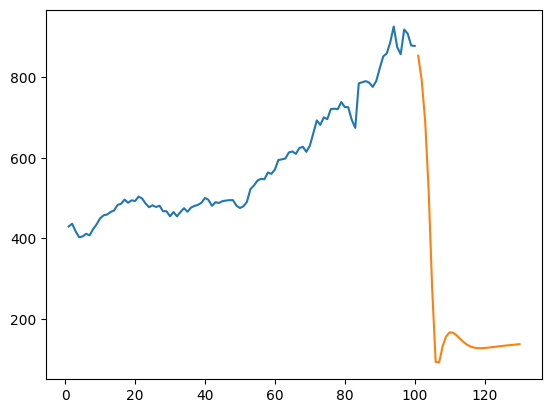

In [ ]:
#plotting for next 30 days after 1259
plt.plot(day_new, scale.inverse_transform(df1[1159: ])) #real data from 1159 to 1259
plt.plot(day_pred, scale.inverse_transform(lst_output))#next 30 days data

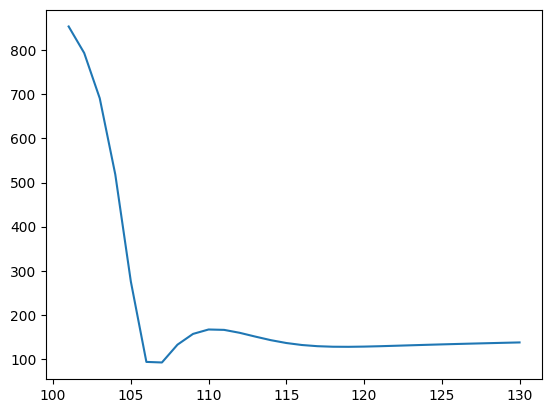

In [ ]:
plt.plot(day_pred, scale.inverse_transform(lst_output))#next 30 days data

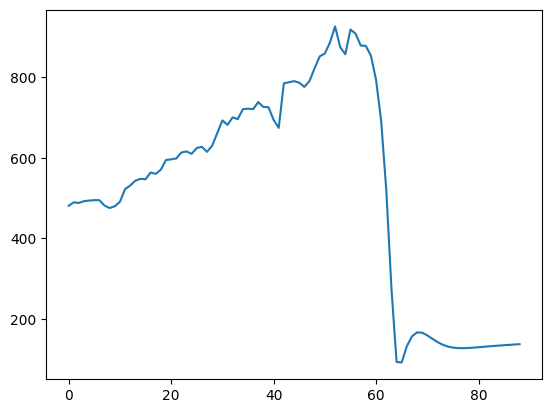

In [ ]:
# Inverse transform the original data (df1) and the predicted values (lst_output)
original_data = scale.inverse_transform(df1)
predicted_values = scale.inverse_transform(lst_output)

# Extend the original data with the predicted values
combined_data = np.concatenate((original_data, predicted_values), axis=0)

# Plot the combined data from index 1200 onwards till 1289(last 30 days is prediction)
plt.plot(combined_data[1200:])
plt.show()
